## Classification 
predict which group a new target object belongs to by comparing it to identified objects. The identified, or labeled objects are called the training set.

## KNN - K-Nearest Neighbors
Find the k nearest objects to the target object using some distance metric. Then these k nearest neighbors get to vote on the identity of the target object.  
For example, if k=5, we find the 5 nearest objects in our training set. If three of them are apples, one is a pear and one is an orange then we predict our target object is an apple.  

In [1]:
import numpy as np
import pandas as pd

In [15]:
train = pd.read_csv('iris.data')
train.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


Rename columns of training set, and add a column for distance.

In [16]:
train = train.drop('id', 1)
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
train.rename(columns = {cols[0]:0, cols[1]:1, cols[2]:2, cols[3]:3}, inplace=True)
train['distance'] = 9999
train.head()

,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,9999
1,4.9,3.0,1.4,0.2,Iris-setosa,9999
2,4.7,3.2,1.3,0.2,Iris-setosa,9999
3,4.6,3.1,1.5,0.2,Iris-setosa,9999
4,5.0,3.6,1.4,0.2,Iris-setosa,9999


Create an unidentified Target instance, then we will try to predict its species using knn.

In [3]:
target = pd.Series([7.0, 3.1, 5.6, 1.9])
target

0    7.0
1    3.1
2    5.6
3    1.9
dtype: float64

### Distance
There are a variety of ways to measure [distance](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa).  If there are many attributes, we may use a subset of the attributes to compare objects.  
We'll use Euclidean distance, similar to Pythagorean Theorem but scaled to more attributes.  
We compute the distance of every training instance from the target.

In [4]:
train['distance'] = ((train.loc[:,0]-target[0])**2 + (train.loc[:,1]-target[1])**2 + (train.loc[:,2]-target[2])**2 + (train.loc[:,3]-target[3])**2) ** 0.5
train.loc[::10]

,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,4.929503
10,5.4,3.7,1.5,0.2,Iris-setosa,4.756049
20,5.4,3.4,1.7,0.2,Iris-setosa,4.555217
30,4.8,3.1,1.6,0.2,Iris-setosa,4.871345
40,5.0,3.5,1.3,0.3,Iris-setosa,5.020956
50,7.0,3.2,4.7,1.4,Iris-versicolor,1.034408
60,5.0,2.0,3.5,1.0,Iris-versicolor,3.229551
70,5.9,3.2,4.8,1.8,Iris-versicolor,1.367479
80,5.5,2.4,3.8,1.1,Iris-versicolor,2.572936
90,5.5,2.6,4.4,1.2,Iris-versicolor,2.104757


We sort the training records by distance, and add the species of the (k=7) items nearest to the target to a list.

In [12]:
k = 7
train = train.sort_values('distance', ascending=True)
knn = list(train.head(k).species)
knn

['Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

We use mode to get the most popular of the knn list. In this example the whole knn list is Iris-virginica, so our prediction is obvious. But sometimes the list of nearest neighbors will be a variety, and the mode tells us our prediction.

In [13]:
from statistics import mode
print(mode(knn))

Iris-virginica


To check our prediction, we plot the training set on a scatter plot, then plot our target. Here we can see our target is surrounded by Iris-virginica instances, so our prediction is probably correct.

Text(0.5, 1.0, 'Iris Data Scatter Plot')

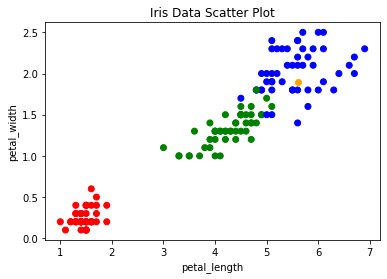

In [14]:
import matplotlib.pyplot as plt
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    train[2], 
    train[3], 
    c=train['species'].map(colors))
plt.scatter(target[2], target[3], c='orange')
plt.xlabel(cols[2])
plt.ylabel(cols[3])
plt.title('Iris Data Scatter Plot')